In [ ]:
pip install -r requirements1.txt

In [43]:
# import numpy as np
# from numpy import array
# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline
# import string
# import os
# from PIL import Image
# import glob
# from pickle import dump, load
# from time import time
# from keras.preprocessing import sequence
# from keras.models import Sequential
# from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
# from keras.optimizers import Adam, RMSprop
# from keras.layers.wrappers import Bidirectional
# from keras.layers.merge import add
# from keras.applications.inception_v3 import InceptionV3
# from keras.preprocessing import image
# from keras.models import Model
# from keras import Input, layers
# from keras import optimizers
# from keras.applications.inception_v3 import preprocess_input
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical

In [40]:
import numpy as np
from numpy import array
import pandas as pd
from keras.applications.inception_v3 import InceptionV3
from pickle import dump, load
import matplotlib.pyplot as plt
from keras.models import Model
from keras.preprocessing import image
%matplotlib inline
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras.applications.inception_v3 import preprocess_input

In [41]:
def preprocess(image_path):
    # img = load_img(image_path, target_size=(299, 299))
    # x= img_to_array(img)
    # Convert all the images to size 299x299 as expected by the inception v3 model
    img = image.load_img(image_path, target_size=(299, 299))
    # Convert PIL image to numpy array of 3-dimensions
    x = image.img_to_array(img)
    # Add one more dimension
    x = np.expand_dims(x, axis=0)
    # preprocess the images using preprocess_input() from inception module
    x = preprocess_input(x)
    return x

In [42]:
modell = InceptionV3(weights='imagenet')

In [43]:
model_new = Model(modell.input, modell.layers[-2].output)

In [44]:
def encode(image):
    image = preprocess(image) # preprocess the image
    fea_vec = model_new.predict(image) # Get the encoding vector for the image
    fea_vec = np.reshape(fea_vec, fea_vec.shape[1]) # reshape from (1, 2048) to (2048, )
    return fea_vec

In [50]:
def text_to_dict(file_name):
    file = open("{}.txt".format(file_name), "r")
    return eval(file.read())
wordtoix = text_to_dict("wordtoix")
ixtoword = text_to_dict("ixtoword")

In [51]:
def imageSearch(photo):
    in_text = 'startseq'
    for i in range(34):
        sequence = [wordtoix[w] for w in in_text.split() if w in wordtoix]
        sequence = pad_sequences([sequence], maxlen=34)
        yhat = model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

In [49]:
model = load_model('model_weights/model_149.h5')

In [84]:
pred_image="data/images/pic.jpg"

In [85]:
# n_image = encode(pred_image).reshape((1,2048))

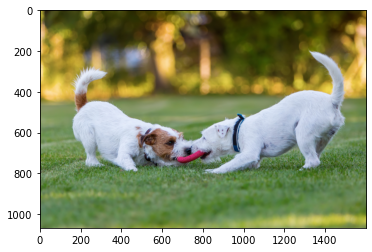

Image with Caption: two white dogs are running through the grass


In [86]:
# Your result
# pic = list(encoding_test.keys())[1]
# image = encoding_test[pic].reshape((1,2048))
x=plt.imread(pred_image)
plt.imshow(x)
plt.show()
print("Image with Caption:",imageSearch(encode(pred_image).reshape((1,2048))))